In [ ]:
// --------------------------------------------------------------------------------------------------
// #EE569 Homework Assignment #4
// #Date: March 19, 2019
// #Name: Suchismita Sahu
// #ID: 7688176370
// #email: suchisms@usc.edu
// --------------------------------------------------------------------------------------------------

In [65]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
import glob
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import linalg

In [22]:
length = 128
width = 128
input_images = []
pixel_mean = np.zeros(12)

In [23]:
def read_raw(filename, length, width):
    input_raw_image = open(filename,'rb').read()
    input_raw_image = np.frombuffer(input_raw_image, np.uint8).copy()
    img = input_raw_image[0 : length*width]
    img = np.reshape(img, (length,width))
    return img

In [25]:
for i in range(12):
    texture_images = open('{}{}.raw'.format('texture', i+1), 'rb').read()
    texture_images = np.frombuffer(texture_images, np.uint8)
    img = texture_images[0:128*128]
    input_images.append(np.reshape(img, (128,128)))
    pixel_mean[i] = np.sum(input_images[i])/(length*width)

In [5]:
img1 = read_raw('texture1.raw', 128, 128)
#plt.matshow(img, cmap = 'gray')

In [6]:
img2 = read_raw('texture2.raw', 128, 128)
#plt.matshow(img, cmap = 'gray')

In [7]:
img = read_raw('texture3.raw', 128, 128)
#plt.matshow(img, cmap = 'gray')

In [8]:
img = read_raw('texture4.raw', 128, 128)
#plt.matshow(img, cmap = 'gray')

In [10]:
img = read_raw('texture5.raw', 128, 128)
#plt.matshow(img, cmap = 'gray')

In [11]:
img = read_raw('texture6.raw', 128, 128)
#plt.matshow(img, cmap = 'gray')

In [12]:
img = read_raw('texture7.raw', 128, 128)
#plt.matshow(img, cmap = 'gray')

In [13]:
img = read_raw('texture8.raw', 128, 128)
#plt.matshow(img, cmap = 'gray')

In [14]:
img = read_raw('texture9.raw', 128, 128)
#plt.matshow(img, cmap = 'gray')

In [15]:
img = read_raw('texture10.raw', 128, 128)
#plt.matshow(img, cmap = 'gray')

In [16]:
img = read_raw('texture11.raw', 128, 128)
#plt.matshow(img, cmap = 'gray')

In [17]:
img = read_raw('texture12.raw', 128, 128)
#plt.matshow(img, cmap = 'gray')

In [18]:
img = read_raw('comb.raw', 510, 510)
#plt.matshow(img, cmap = 'gray')

In [27]:
# Subtracting Mean from the pixels
new_image = np.zeros((12, 128, 128))
for k in range(12):
    for i in range(length):
        for j in range(width):
            new_image[k][i][j] = input_images[k][i][j] - pixel_mean[k] 
        

In [28]:
# 1D Laws Filters
L5 = np.array([1, 4, 6, 4, 1]).reshape((1, 5))
E5 = np.array([-1, -2, 0, 2, 1]).reshape((1, 5))
S5 = np.array([-1, 0, 2, 0, -1]).reshape((1, 5))
W5 = np.array([-1, 2, 0, -2, 1]).reshape((1, 5))
R5 = np.array([1, -4, 6, -4, 1]).reshape((1, 5))

In [30]:
basic_filters = {
    'L5': L5,
    'E5': E5,
    'S5': S5,
    'W5': W5,
    'R5': R5}

In [46]:
laws_filters = {}
for key1, val1 in basic_filters.items():
    for key2, val2 in basic_filters.items():
        key3 = key1 + key2
        value = np.matmul(val1.T, val2)
        laws_filters[key3] = value

In [48]:
#laws_filters

In [74]:
def convolve(i,j,kernel,image):
    pixel = 0.0;
    for k in range(i,i+5):
        for l in range(j,j+5):
            pixel += (image[k][l] * kernel[k-i][l-j])
    return pixel;

In [49]:
extended_images = []
for image in new_image:
    extend_image = np.pad(image, ((2, 2), (2, 2)), 'reflect')
    extended_images.append(extend_image)

In [52]:
images_after_filter_25 = []
images_after_filter_15 = []
for image in extended_images:
    temp = []
    for val in laws_filters:
        a = convolve(image, laws_filters[val])
#         a = np.abs(a)
        temp.append(a.mean())
    images_after_filter_25.append(temp)
    temp = []
    for val in valid:
        if type(val) == tuple:
            a = convolve(image, laws_filters[val[0]])
#             a = np.abs(a)
            a = a.mean()
            b = convolve(image, laws_filters[val[1]])
#             b = np.abs(b)
            b = b.mean()
            c = (a + b) / 2
            temp.append(c)
        else:
            a = convolve(image, laws_filters[val])
#             a = np.abs(a)
            temp.append(a.mean())
    images_after_filter_15.append(temp)

In [53]:
vectors_25 = np.array(images_after_filter_25)
vectors_15 = np.array(images_after_filter_15)
vectors_norm = (vectors_15 - np.min(vectors_15, axis=0))/(np.max(vectors_15, axis=0) - np.min(vectors_15, axis=0))

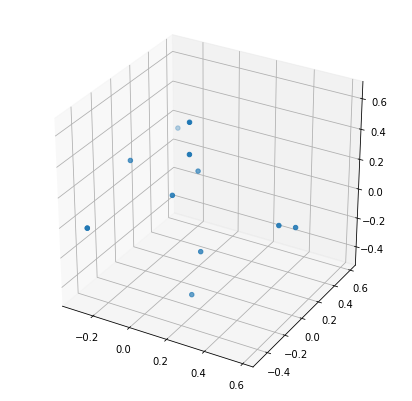

In [54]:
vector_eigen_val, vector_eigen_vect = cv2.PCACompute(vectors_norm.T, mean=None, maxComponents=3)
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(1, figsize=(7,7))
ax_3d = plt.axes(projection='3d')
ax_3d.scatter3D(vector_eigen_vect.T[:,0], vector_eigen_vect.T[:,1], vector_eigen_vect.T[:,2], cmap='greens')
plt.show()

In [55]:
new_x = np.float32(vector_eigen_vect.T)

In [56]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.1)

# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS

# Apply KMeans
compactness,labels,centers = cv2.kmeans(data=new_x, K=4, bestLabels=None, criteria=criteria, attempts=10, flags=flags)

In [57]:
labels

array([[1],
       [1],
       [0],
       [3],
       [0],
       [2],
       [0],
       [2],
       [0],
       [3],
       [2],
       [2]], dtype=int32)

In [59]:
from collections import defaultdict
clustered_images = defaultdict(list)
for image, label in zip(input_images, labels):
    clustered_images[label[0]].append(image)

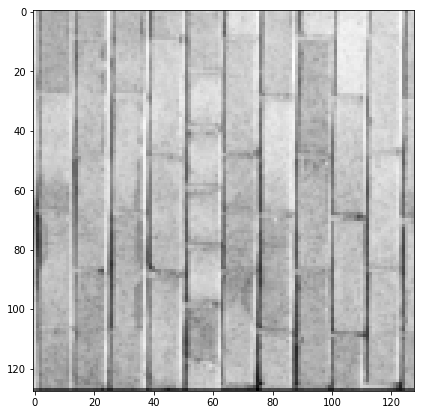

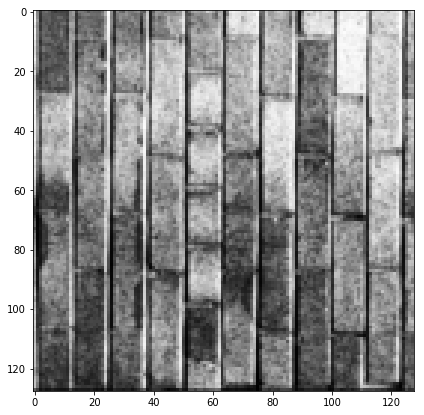

In [67]:
for image in clustered_images[3]:
    plt.figure(figsize=(7,7))
    plt.imshow(image, cmap='gray')
    plt.show()